In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [59]:
data=pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [60]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [61]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [63]:
missing_values=data.isnull().sum()
missing_values[missing_values>0]

Year         271
Publisher     58
dtype: int64

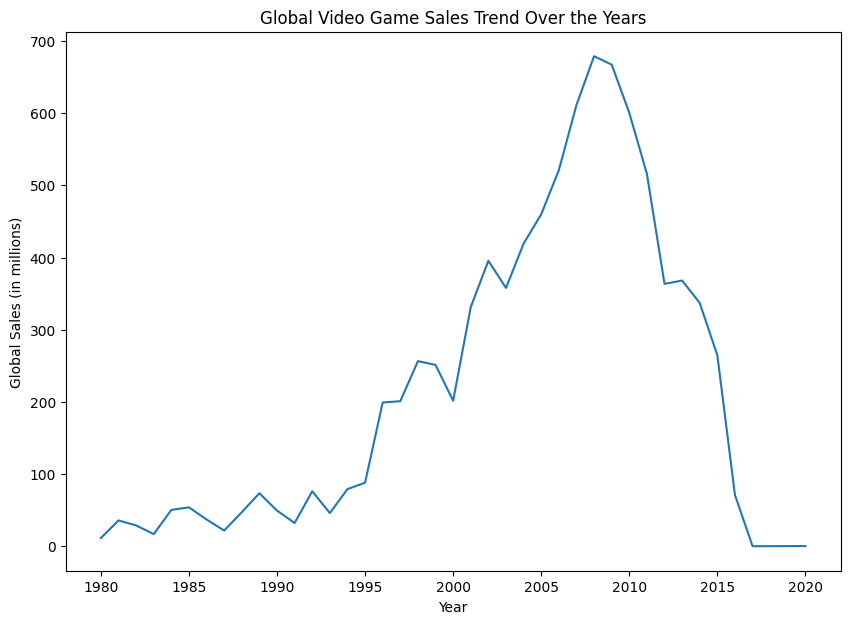

In [64]:
yearly_sales=data.groupby("Year")["Global_Sales"].sum()
plt.figure(figsize=(10,7))
sns.lineplot(x=yearly_sales.index,y=yearly_sales.values)
plt.title('Global Video Game Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

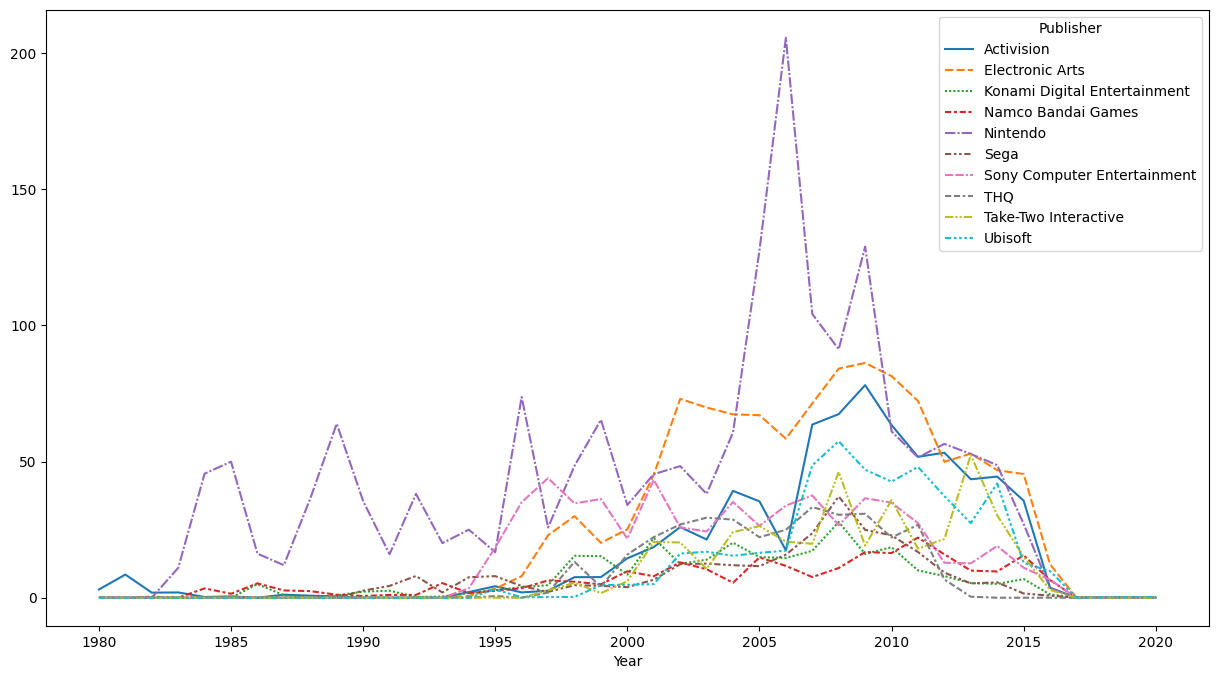

In [65]:
#lineplot of publishers by global sales 
top_publishers= data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index
top_publishers_data=data[data["Publisher"].isin(top_publishers)]
yearly_publisher_sales = top_publishers_data.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack().fillna(0)

# Plotting the yearly performance of top publishers
plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_publisher_sales)
plt.show()


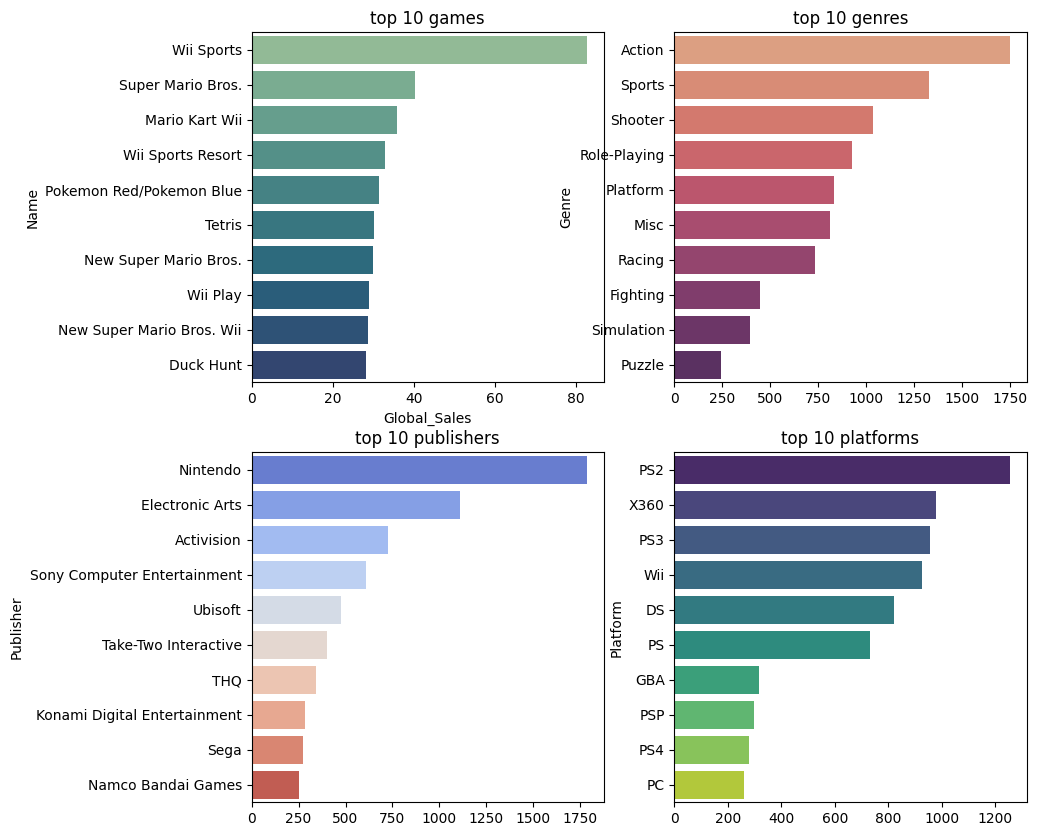

In [66]:
top10games = data[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
top10genres=data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10platforms=data.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
top10pub=data.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)

fig,axs=plt.subplots(2,2,figsize=(10, 10))
sns.barplot(ax=axs[0,0],x=top10games["Global_Sales"],y=top10games["Name"],palette="crest")
axs[0,0].set_title("top 10 games")
sns.barplot(ax=axs[0,1],x=top10genres.values, y=top10genres.index,palette="flare")
axs[0,1].set_title("top 10 genres")
sns.barplot(ax=axs[1,1],x=top10platforms.values,y=top10platforms.index,palette="viridis")
axs[1,1].set_title("top 10 platforms")
sns.barplot(ax=axs[1,0],x=top10pub.values,y=top10pub.index,palette="coolwarm")
axs[1,0].set_title("top 10 publishers")
plt.show()


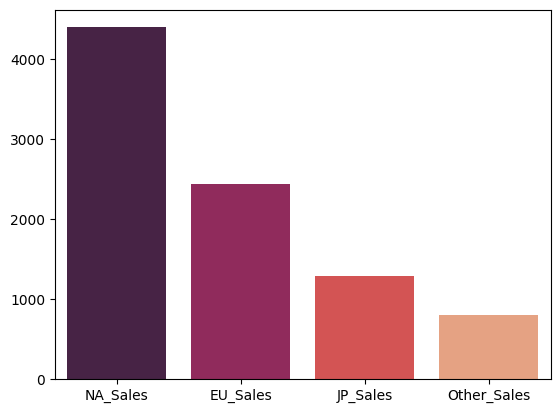

In [67]:
sales_reg=data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sns.barplot(x=sales_reg.index,y=sales_reg.values,palette="rocket")

plt.show()

<Axes: xlabel='Sales', ylabel='Platform'>

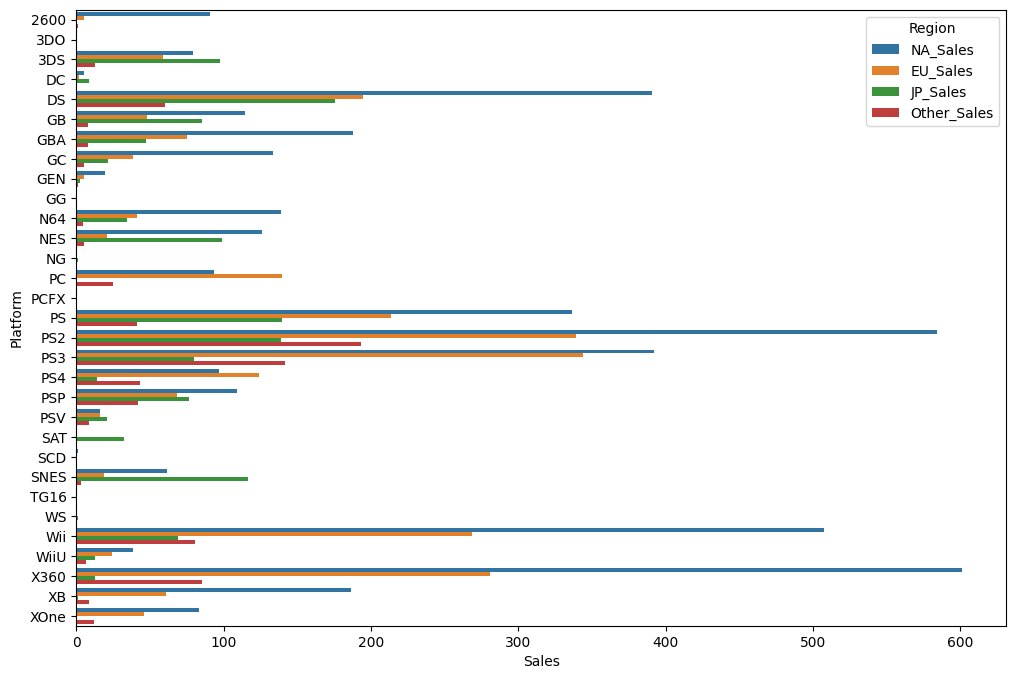

In [68]:
#platforms by region
regional_platform_sales = data.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_platform_sales_melted = regional_platform_sales.reset_index().melt(id_vars='Platform', var_name='Region', value_name='Sales')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Platform', hue='Region', data=regional_platform_sales_melted)

In [69]:
# genres by region
regional_genre_sales = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_genre_sales_melted = regional_platform_sales.reset_index().melt(id_vars='Genre', var_name='Region', value_name='Sales')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Genre', hue='Region', data=regional_genre_sales_melted)
plt.show()

KeyError: 'Genre'